<a href="https://colab.research.google.com/github/B4Farouk/smpl-dr-clip/blob/main/SMPL_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install smplpytorch
!pip install chumpy
!git clone https://github.com/B4Farouk/smpl-dr-clip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58286 sha256=45f2b8b05eca38b9d23a45c272f5b077972d788db29553ac0aecb15f9df67f7d
  Stored in directory: /root/.cache/pip/wheels/59/68/de/5e0c5d77e573e8c150e69e07a25035e6b6a04952d6e1814dbc
Successfully built chumpy
Cloning into 'smpl-dr-clip'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 54 (delta 25), reused 22 (delta 5), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# plt.switch_backend('agg')


def display_model(
        model_info,
        model_faces=None,
        with_joints=False,
        kintree_table=None,
        ax=None,
        batch_idx=0,
        show=True,
        savepath=None):
    """
    Displays mesh batch_idx in batch of model_info, model_info as returned by
    generate_random_model
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    verts, joints = model_info['verts'][batch_idx], model_info['joints'][
        batch_idx]
    if model_faces is None:
        ax.scatter(verts[:, 0], verts[:, 1], verts[:, 2], alpha=0.2)
    else:
        mesh = Poly3DCollection(verts[model_faces], alpha=0.2)
        face_color = (141 / 255, 184 / 255, 226 / 255)
        edge_color = (50 / 255, 50 / 255, 50 / 255)
        mesh.set_edgecolor(edge_color)
        mesh.set_facecolor(face_color)
        ax.add_collection3d(mesh)
    if with_joints:
        draw_skeleton(joints, kintree_table=kintree_table, ax=ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-0.7, 0.7)
    ax.set_ylim(-0.7, 0.7)
    ax.set_zlim(-0.7, 0.7)
    ax.view_init(azim=-90, elev=100)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    if savepath:
        print('Saving figure at {}.'.format(savepath))
        plt.savefig(savepath, bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()
    return mesh


def draw_skeleton(joints3D, kintree_table, ax=None, with_numbers=True):
    if ax is None:
        fig = plt.figure(frameon=False)
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = ax

    colors = []
    left_right_mid = ['r', 'g', 'b']
    kintree_colors = [2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1]
    for c in kintree_colors:
        colors += left_right_mid[c]
    # For each 24 joint
    for i in range(1, kintree_table.shape[1]):
        j1 = kintree_table[0][i]
        j2 = kintree_table[1][i]
        ax.plot([joints3D[j1, 0], joints3D[j2, 0]],
                [joints3D[j1, 1], joints3D[j2, 1]],
                [joints3D[j1, 2], joints3D[j2, 2]],
                color=colors[i], linestyle='-', linewidth=2, marker='o', markersize=5)
        if with_numbers:
            ax.text(joints3D[j2, 0], joints3D[j2, 1], joints3D[j2, 2], j2)
    return 

Saving figure at image.png.


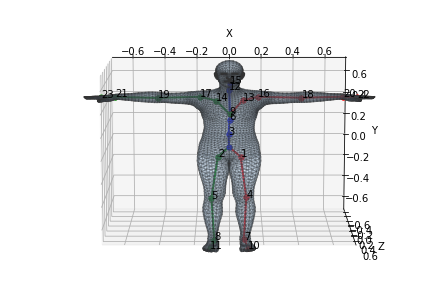

In [50]:
import torch

from smplpytorch.pytorch.smpl_layer import SMPL_Layer



batch_size = 1

# Create the SMPL layer
smpl_layer = SMPL_Layer(
center_idx=0,
gender='neutral',
model_root='/content/smpl-dr-clip')

# Generate T pose
pose_params = torch.zeros(batch_size, 72)
shape_params = torch.zeros(batch_size, 10)

# Forward from the SMPL layer

true_verts, true_Jtr = smpl_layer(pose_params, th_betas=shape_params)

# Draw output vertices and joints
display_model(
        {'verts': true_verts.cpu().detach(),
         'joints': true_Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)

In [68]:
def mse_loss(x,y):
  return torch.sum(torch.sum(torch.square(x-y)))

def loss_function(true_verts,vertst):
  return mse_loss(true_verts,verts)


tensor(4713.7383, grad_fn=<SumBackward0>)
Saving figure at image.png.


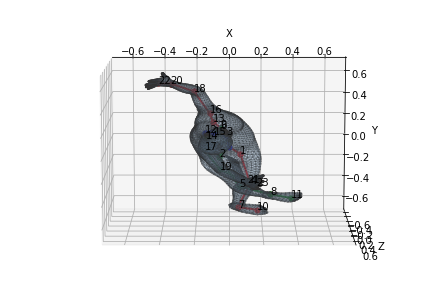

tensor(1753.8148, grad_fn=<SumBackward0>)
tensor(761.3801, grad_fn=<SumBackward0>)
tensor(472.7066, grad_fn=<SumBackward0>)
tensor(336.3668, grad_fn=<SumBackward0>)
tensor(265.0969, grad_fn=<SumBackward0>)
tensor(220.9927, grad_fn=<SumBackward0>)
tensor(189.7023, grad_fn=<SumBackward0>)
tensor(165.7448, grad_fn=<SumBackward0>)
tensor(146.6568, grad_fn=<SumBackward0>)
tensor(131.0788, grad_fn=<SumBackward0>)
tensor(118.1445, grad_fn=<SumBackward0>)
tensor(107.2602, grad_fn=<SumBackward0>)
tensor(98.0011, grad_fn=<SumBackward0>)
tensor(90.0549, grad_fn=<SumBackward0>)
tensor(83.1867, grad_fn=<SumBackward0>)
tensor(77.2153, grad_fn=<SumBackward0>)
tensor(71.9985, grad_fn=<SumBackward0>)
tensor(67.4227, grad_fn=<SumBackward0>)
tensor(63.3950, grad_fn=<SumBackward0>)
tensor(59.8393, grad_fn=<SumBackward0>)
tensor(56.6916, grad_fn=<SumBackward0>)
tensor(53.8981, grad_fn=<SumBackward0>)
tensor(51.4131, grad_fn=<SumBackward0>)
tensor(49.1974, grad_fn=<SumBackward0>)
tensor(47.2174, grad_fn=<Su

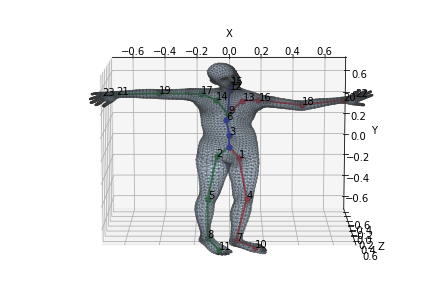

tensor(19.9555, grad_fn=<SumBackward0>)
tensor(19.8309, grad_fn=<SumBackward0>)
tensor(19.7075, grad_fn=<SumBackward0>)
tensor(19.5853, grad_fn=<SumBackward0>)
tensor(19.4642, grad_fn=<SumBackward0>)
tensor(19.3443, grad_fn=<SumBackward0>)
tensor(19.2254, grad_fn=<SumBackward0>)
tensor(19.1077, grad_fn=<SumBackward0>)
tensor(18.9910, grad_fn=<SumBackward0>)
tensor(18.8754, grad_fn=<SumBackward0>)
tensor(18.7609, grad_fn=<SumBackward0>)
tensor(18.6473, grad_fn=<SumBackward0>)
tensor(18.5348, grad_fn=<SumBackward0>)
tensor(18.4233, grad_fn=<SumBackward0>)
tensor(18.3129, grad_fn=<SumBackward0>)
tensor(18.2033, grad_fn=<SumBackward0>)
tensor(18.0948, grad_fn=<SumBackward0>)
tensor(17.9872, grad_fn=<SumBackward0>)
tensor(17.8805, grad_fn=<SumBackward0>)
tensor(17.7748, grad_fn=<SumBackward0>)
tensor(17.6700, grad_fn=<SumBackward0>)
tensor(17.5661, grad_fn=<SumBackward0>)
tensor(17.4631, grad_fn=<SumBackward0>)
tensor(17.3610, grad_fn=<SumBackward0>)
tensor(17.2598, grad_fn=<SumBackward0>)


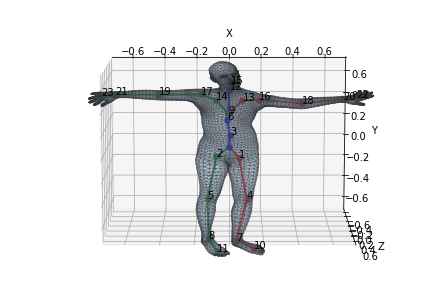

tensor(11.5098, grad_fn=<SumBackward0>)
tensor(11.4536, grad_fn=<SumBackward0>)
tensor(11.3978, grad_fn=<SumBackward0>)
tensor(11.3424, grad_fn=<SumBackward0>)
tensor(11.2874, grad_fn=<SumBackward0>)
tensor(11.2328, grad_fn=<SumBackward0>)
tensor(11.1786, grad_fn=<SumBackward0>)
tensor(11.1247, grad_fn=<SumBackward0>)
tensor(11.0711, grad_fn=<SumBackward0>)
tensor(11.0180, grad_fn=<SumBackward0>)
tensor(10.9652, grad_fn=<SumBackward0>)
tensor(10.9128, grad_fn=<SumBackward0>)
tensor(10.8607, grad_fn=<SumBackward0>)
tensor(10.8089, grad_fn=<SumBackward0>)
tensor(10.7575, grad_fn=<SumBackward0>)
tensor(10.7065, grad_fn=<SumBackward0>)
tensor(10.6558, grad_fn=<SumBackward0>)
tensor(10.6054, grad_fn=<SumBackward0>)
tensor(10.5554, grad_fn=<SumBackward0>)
tensor(10.5057, grad_fn=<SumBackward0>)
tensor(10.4564, grad_fn=<SumBackward0>)
tensor(10.4073, grad_fn=<SumBackward0>)
tensor(10.3586, grad_fn=<SumBackward0>)
tensor(10.3102, grad_fn=<SumBackward0>)
tensor(10.2622, grad_fn=<SumBackward0>)


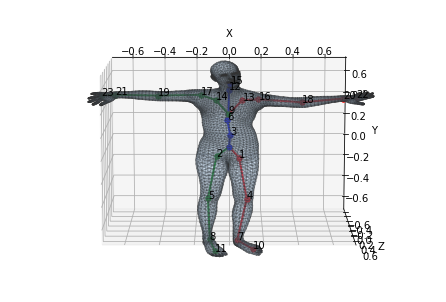

tensor(7.3695, grad_fn=<SumBackward0>)
tensor(7.3396, grad_fn=<SumBackward0>)
tensor(7.3098, grad_fn=<SumBackward0>)
tensor(7.2803, grad_fn=<SumBackward0>)
tensor(7.2509, grad_fn=<SumBackward0>)
tensor(7.2216, grad_fn=<SumBackward0>)
tensor(7.1926, grad_fn=<SumBackward0>)
tensor(7.1637, grad_fn=<SumBackward0>)
tensor(7.1350, grad_fn=<SumBackward0>)
tensor(7.1064, grad_fn=<SumBackward0>)
tensor(7.0780, grad_fn=<SumBackward0>)
tensor(7.0497, grad_fn=<SumBackward0>)
tensor(7.0216, grad_fn=<SumBackward0>)
tensor(6.9937, grad_fn=<SumBackward0>)
tensor(6.9660, grad_fn=<SumBackward0>)
tensor(6.9383, grad_fn=<SumBackward0>)
tensor(6.9109, grad_fn=<SumBackward0>)
tensor(6.8836, grad_fn=<SumBackward0>)
tensor(6.8564, grad_fn=<SumBackward0>)
tensor(6.8294, grad_fn=<SumBackward0>)
tensor(6.8026, grad_fn=<SumBackward0>)
tensor(6.7759, grad_fn=<SumBackward0>)
tensor(6.7494, grad_fn=<SumBackward0>)
tensor(6.7230, grad_fn=<SumBackward0>)
tensor(6.6967, grad_fn=<SumBackward0>)
tensor(6.6706, grad_fn=<S

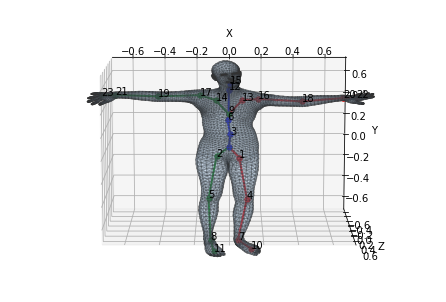

tensor(5.0636, grad_fn=<SumBackward0>)
tensor(5.0461, grad_fn=<SumBackward0>)
tensor(5.0287, grad_fn=<SumBackward0>)
tensor(5.0114, grad_fn=<SumBackward0>)
tensor(4.9941, grad_fn=<SumBackward0>)
tensor(4.9770, grad_fn=<SumBackward0>)
tensor(4.9600, grad_fn=<SumBackward0>)
tensor(4.9430, grad_fn=<SumBackward0>)
tensor(4.9261, grad_fn=<SumBackward0>)
tensor(4.9093, grad_fn=<SumBackward0>)
tensor(4.8926, grad_fn=<SumBackward0>)
tensor(4.8759, grad_fn=<SumBackward0>)
tensor(4.8594, grad_fn=<SumBackward0>)
tensor(4.8429, grad_fn=<SumBackward0>)
tensor(4.8265, grad_fn=<SumBackward0>)
tensor(4.8102, grad_fn=<SumBackward0>)
tensor(4.7940, grad_fn=<SumBackward0>)
tensor(4.7778, grad_fn=<SumBackward0>)
tensor(4.7618, grad_fn=<SumBackward0>)
tensor(4.7458, grad_fn=<SumBackward0>)
tensor(4.7299, grad_fn=<SumBackward0>)
tensor(4.7140, grad_fn=<SumBackward0>)
tensor(4.6983, grad_fn=<SumBackward0>)
tensor(4.6826, grad_fn=<SumBackward0>)
tensor(4.6670, grad_fn=<SumBackward0>)
tensor(4.6514, grad_fn=<S

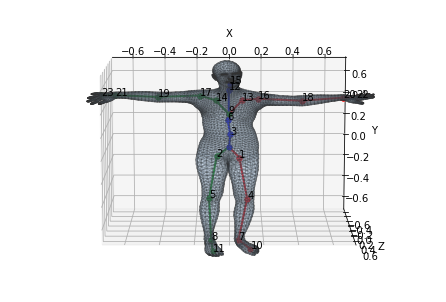

tensor(3.6726, grad_fn=<SumBackward0>)
tensor(3.6617, grad_fn=<SumBackward0>)
tensor(3.6508, grad_fn=<SumBackward0>)
tensor(3.6400, grad_fn=<SumBackward0>)
tensor(3.6292, grad_fn=<SumBackward0>)
tensor(3.6185, grad_fn=<SumBackward0>)
tensor(3.6078, grad_fn=<SumBackward0>)
tensor(3.5972, grad_fn=<SumBackward0>)
tensor(3.5866, grad_fn=<SumBackward0>)
tensor(3.5761, grad_fn=<SumBackward0>)
tensor(3.5656, grad_fn=<SumBackward0>)
tensor(3.5552, grad_fn=<SumBackward0>)
tensor(3.5448, grad_fn=<SumBackward0>)
tensor(3.5344, grad_fn=<SumBackward0>)
tensor(3.5241, grad_fn=<SumBackward0>)
tensor(3.5138, grad_fn=<SumBackward0>)
tensor(3.5036, grad_fn=<SumBackward0>)
tensor(3.4935, grad_fn=<SumBackward0>)
tensor(3.4833, grad_fn=<SumBackward0>)
tensor(3.4733, grad_fn=<SumBackward0>)
tensor(3.4632, grad_fn=<SumBackward0>)
tensor(3.4532, grad_fn=<SumBackward0>)
tensor(3.4433, grad_fn=<SumBackward0>)
tensor(3.4334, grad_fn=<SumBackward0>)
tensor(3.4235, grad_fn=<SumBackward0>)
tensor(3.4137, grad_fn=<S

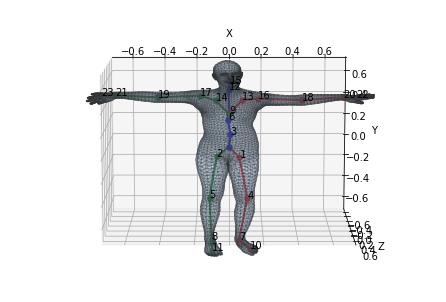

tensor(2.7837, grad_fn=<SumBackward0>)
tensor(2.7765, grad_fn=<SumBackward0>)
tensor(2.7694, grad_fn=<SumBackward0>)
tensor(2.7623, grad_fn=<SumBackward0>)
tensor(2.7552, grad_fn=<SumBackward0>)
tensor(2.7482, grad_fn=<SumBackward0>)
tensor(2.7412, grad_fn=<SumBackward0>)
tensor(2.7342, grad_fn=<SumBackward0>)
tensor(2.7272, grad_fn=<SumBackward0>)
tensor(2.7203, grad_fn=<SumBackward0>)
tensor(2.7134, grad_fn=<SumBackward0>)
tensor(2.7065, grad_fn=<SumBackward0>)
tensor(2.6997, grad_fn=<SumBackward0>)
tensor(2.6929, grad_fn=<SumBackward0>)
tensor(2.6861, grad_fn=<SumBackward0>)
tensor(2.6793, grad_fn=<SumBackward0>)
tensor(2.6726, grad_fn=<SumBackward0>)
tensor(2.6659, grad_fn=<SumBackward0>)
tensor(2.6592, grad_fn=<SumBackward0>)
tensor(2.6525, grad_fn=<SumBackward0>)
tensor(2.6459, grad_fn=<SumBackward0>)
tensor(2.6393, grad_fn=<SumBackward0>)
tensor(2.6327, grad_fn=<SumBackward0>)
tensor(2.6262, grad_fn=<SumBackward0>)
tensor(2.6196, grad_fn=<SumBackward0>)
tensor(2.6131, grad_fn=<S

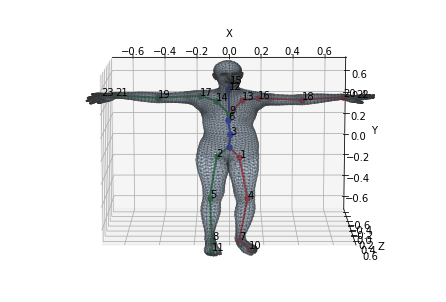

tensor(2.1903, grad_fn=<SumBackward0>)
tensor(2.1854, grad_fn=<SumBackward0>)
tensor(2.1806, grad_fn=<SumBackward0>)
tensor(2.1757, grad_fn=<SumBackward0>)
tensor(2.1709, grad_fn=<SumBackward0>)
tensor(2.1661, grad_fn=<SumBackward0>)
tensor(2.1613, grad_fn=<SumBackward0>)
tensor(2.1566, grad_fn=<SumBackward0>)
tensor(2.1518, grad_fn=<SumBackward0>)
tensor(2.1471, grad_fn=<SumBackward0>)
tensor(2.1424, grad_fn=<SumBackward0>)
tensor(2.1377, grad_fn=<SumBackward0>)
tensor(2.1330, grad_fn=<SumBackward0>)
tensor(2.1284, grad_fn=<SumBackward0>)
tensor(2.1237, grad_fn=<SumBackward0>)
tensor(2.1191, grad_fn=<SumBackward0>)
tensor(2.1145, grad_fn=<SumBackward0>)
tensor(2.1099, grad_fn=<SumBackward0>)
tensor(2.1053, grad_fn=<SumBackward0>)
tensor(2.1007, grad_fn=<SumBackward0>)
tensor(2.0962, grad_fn=<SumBackward0>)
tensor(2.0917, grad_fn=<SumBackward0>)
tensor(2.0872, grad_fn=<SumBackward0>)
tensor(2.0827, grad_fn=<SumBackward0>)
tensor(2.0782, grad_fn=<SumBackward0>)
tensor(2.0737, grad_fn=<S

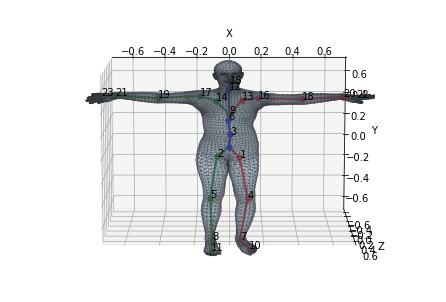

tensor(1.7802, grad_fn=<SumBackward0>)
tensor(1.7767, grad_fn=<SumBackward0>)
tensor(1.7733, grad_fn=<SumBackward0>)
tensor(1.7699, grad_fn=<SumBackward0>)
tensor(1.7665, grad_fn=<SumBackward0>)
tensor(1.7632, grad_fn=<SumBackward0>)
tensor(1.7598, grad_fn=<SumBackward0>)
tensor(1.7564, grad_fn=<SumBackward0>)
tensor(1.7531, grad_fn=<SumBackward0>)
tensor(1.7498, grad_fn=<SumBackward0>)
tensor(1.7464, grad_fn=<SumBackward0>)
tensor(1.7431, grad_fn=<SumBackward0>)
tensor(1.7398, grad_fn=<SumBackward0>)
tensor(1.7365, grad_fn=<SumBackward0>)
tensor(1.7333, grad_fn=<SumBackward0>)
tensor(1.7300, grad_fn=<SumBackward0>)
tensor(1.7267, grad_fn=<SumBackward0>)
tensor(1.7235, grad_fn=<SumBackward0>)
tensor(1.7203, grad_fn=<SumBackward0>)
tensor(1.7171, grad_fn=<SumBackward0>)
tensor(1.7138, grad_fn=<SumBackward0>)
tensor(1.7106, grad_fn=<SumBackward0>)
tensor(1.7075, grad_fn=<SumBackward0>)
tensor(1.7043, grad_fn=<SumBackward0>)
tensor(1.7011, grad_fn=<SumBackward0>)
tensor(1.6979, grad_fn=<S

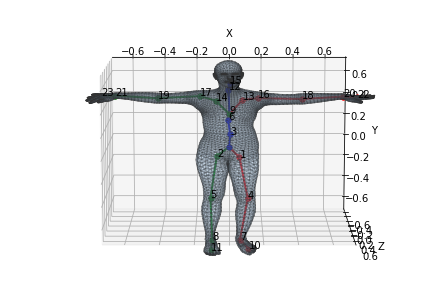

tensor(1.4881, grad_fn=<SumBackward0>)
tensor(1.4856, grad_fn=<SumBackward0>)
tensor(1.4831, grad_fn=<SumBackward0>)
tensor(1.4807, grad_fn=<SumBackward0>)
tensor(1.4782, grad_fn=<SumBackward0>)
tensor(1.4758, grad_fn=<SumBackward0>)
tensor(1.4733, grad_fn=<SumBackward0>)
tensor(1.4709, grad_fn=<SumBackward0>)
tensor(1.4685, grad_fn=<SumBackward0>)
tensor(1.4661, grad_fn=<SumBackward0>)
tensor(1.4637, grad_fn=<SumBackward0>)
tensor(1.4613, grad_fn=<SumBackward0>)
tensor(1.4589, grad_fn=<SumBackward0>)
tensor(1.4565, grad_fn=<SumBackward0>)
tensor(1.4541, grad_fn=<SumBackward0>)
tensor(1.4517, grad_fn=<SumBackward0>)
tensor(1.4494, grad_fn=<SumBackward0>)
tensor(1.4470, grad_fn=<SumBackward0>)
tensor(1.4447, grad_fn=<SumBackward0>)
tensor(1.4423, grad_fn=<SumBackward0>)
tensor(1.4400, grad_fn=<SumBackward0>)
tensor(1.4377, grad_fn=<SumBackward0>)
tensor(1.4354, grad_fn=<SumBackward0>)
tensor(1.4330, grad_fn=<SumBackward0>)
tensor(1.4307, grad_fn=<SumBackward0>)
tensor(1.4284, grad_fn=<S

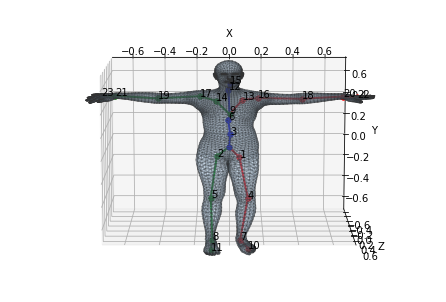

In [72]:
#SGD optimizer


# Generate random pose and shape parameters
pose_params = torch.rand(batch_size, 72)*0.5

pose_params.requires_grad_()
shape_params = torch.rand(batch_size, 10)*0.1
shape_params.requires_grad_()
# Forward from the SMPL layer
optimizer = torch.optim.SGD([pose_params, shape_params], lr=0.0001)
for i in range(1000):
  verts, Jtr = smpl_layer(pose_params, shape_params)

  loss=loss_function(true_verts,verts)
  print(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(i%100==0):
    display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)
# Draw output vertices and joints
display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)

tensor(3903.4060, grad_fn=<SumBackward0>)
Saving figure at image.png.


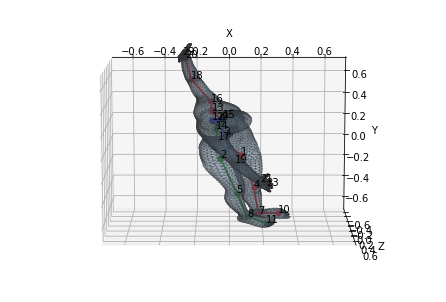

tensor(3891.1475, grad_fn=<SumBackward0>)
tensor(3878.8804, grad_fn=<SumBackward0>)
tensor(3866.6086, grad_fn=<SumBackward0>)
tensor(3854.3293, grad_fn=<SumBackward0>)
tensor(3842.0442, grad_fn=<SumBackward0>)
tensor(3829.7515, grad_fn=<SumBackward0>)
tensor(3817.4536, grad_fn=<SumBackward0>)
tensor(3805.1494, grad_fn=<SumBackward0>)
tensor(3792.8398, grad_fn=<SumBackward0>)
tensor(3780.5237, grad_fn=<SumBackward0>)
tensor(3768.2021, grad_fn=<SumBackward0>)
tensor(3755.8755, grad_fn=<SumBackward0>)
tensor(3743.5427, grad_fn=<SumBackward0>)
tensor(3731.2053, grad_fn=<SumBackward0>)
tensor(3718.8628, grad_fn=<SumBackward0>)
tensor(3706.5166, grad_fn=<SumBackward0>)
tensor(3694.1655, grad_fn=<SumBackward0>)
tensor(3681.8096, grad_fn=<SumBackward0>)
tensor(3669.4504, grad_fn=<SumBackward0>)
tensor(3657.0859, grad_fn=<SumBackward0>)
tensor(3644.7200, grad_fn=<SumBackward0>)
tensor(3632.3496, grad_fn=<SumBackward0>)
tensor(3619.9771, grad_fn=<SumBackward0>)
tensor(3607.6016, grad_fn=<SumBack

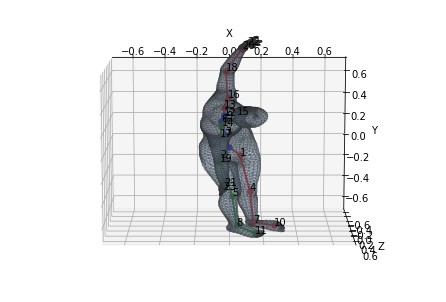

tensor(2672.0945, grad_fn=<SumBackward0>)
tensor(2660.5291, grad_fn=<SumBackward0>)
tensor(2648.9883, grad_fn=<SumBackward0>)
tensor(2637.4709, grad_fn=<SumBackward0>)
tensor(2625.9785, grad_fn=<SumBackward0>)
tensor(2614.5105, grad_fn=<SumBackward0>)
tensor(2603.0686, grad_fn=<SumBackward0>)
tensor(2591.6504, grad_fn=<SumBackward0>)
tensor(2580.2598, grad_fn=<SumBackward0>)
tensor(2568.8940, grad_fn=<SumBackward0>)
tensor(2557.5544, grad_fn=<SumBackward0>)
tensor(2546.2422, grad_fn=<SumBackward0>)
tensor(2534.9561, grad_fn=<SumBackward0>)
tensor(2523.6982, grad_fn=<SumBackward0>)
tensor(2512.4668, grad_fn=<SumBackward0>)
tensor(2501.2632, grad_fn=<SumBackward0>)
tensor(2490.0876, grad_fn=<SumBackward0>)
tensor(2478.9404, grad_fn=<SumBackward0>)
tensor(2467.8218, grad_fn=<SumBackward0>)
tensor(2456.7314, grad_fn=<SumBackward0>)
tensor(2445.6707, grad_fn=<SumBackward0>)
tensor(2434.6396, grad_fn=<SumBackward0>)
tensor(2423.6375, grad_fn=<SumBackward0>)
tensor(2412.6655, grad_fn=<SumBack

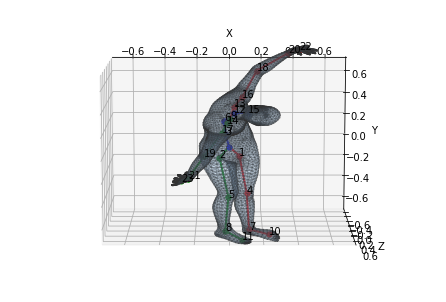

tensor(1672.1140, grad_fn=<SumBackward0>)
tensor(1663.9723, grad_fn=<SumBackward0>)
tensor(1655.8698, grad_fn=<SumBackward0>)
tensor(1647.8063, grad_fn=<SumBackward0>)
tensor(1639.7820, grad_fn=<SumBackward0>)
tensor(1631.7969, grad_fn=<SumBackward0>)
tensor(1623.8508, grad_fn=<SumBackward0>)
tensor(1615.9440, grad_fn=<SumBackward0>)
tensor(1608.0758, grad_fn=<SumBackward0>)
tensor(1600.2468, grad_fn=<SumBackward0>)
tensor(1592.4574, grad_fn=<SumBackward0>)
tensor(1584.7062, grad_fn=<SumBackward0>)
tensor(1576.9937, grad_fn=<SumBackward0>)
tensor(1569.3207, grad_fn=<SumBackward0>)
tensor(1561.6862, grad_fn=<SumBackward0>)
tensor(1554.0905, grad_fn=<SumBackward0>)
tensor(1546.5336, grad_fn=<SumBackward0>)
tensor(1539.0151, grad_fn=<SumBackward0>)
tensor(1531.5353, grad_fn=<SumBackward0>)
tensor(1524.0946, grad_fn=<SumBackward0>)
tensor(1516.6918, grad_fn=<SumBackward0>)
tensor(1509.3276, grad_fn=<SumBackward0>)
tensor(1502.0020, grad_fn=<SumBackward0>)
tensor(1494.7146, grad_fn=<SumBack

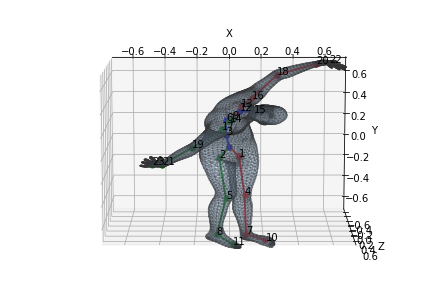

tensor(1040.4248, grad_fn=<SumBackward0>)
tensor(1035.7780, grad_fn=<SumBackward0>)
tensor(1031.1592, grad_fn=<SumBackward0>)
tensor(1026.5690, grad_fn=<SumBackward0>)
tensor(1022.0062, grad_fn=<SumBackward0>)
tensor(1017.4713, grad_fn=<SumBackward0>)
tensor(1012.9637, grad_fn=<SumBackward0>)
tensor(1008.4836, grad_fn=<SumBackward0>)
tensor(1004.0311, grad_fn=<SumBackward0>)
tensor(999.6055, grad_fn=<SumBackward0>)
tensor(995.2065, grad_fn=<SumBackward0>)
tensor(990.8348, grad_fn=<SumBackward0>)
tensor(986.4893, grad_fn=<SumBackward0>)
tensor(982.1705, grad_fn=<SumBackward0>)
tensor(977.8779, grad_fn=<SumBackward0>)
tensor(973.6113, grad_fn=<SumBackward0>)
tensor(969.3711, grad_fn=<SumBackward0>)
tensor(965.1562, grad_fn=<SumBackward0>)
tensor(960.9673, grad_fn=<SumBackward0>)
tensor(956.8040, grad_fn=<SumBackward0>)
tensor(952.6658, grad_fn=<SumBackward0>)
tensor(948.5527, grad_fn=<SumBackward0>)
tensor(944.4651, grad_fn=<SumBackward0>)
tensor(940.4022, grad_fn=<SumBackward0>)
tensor(

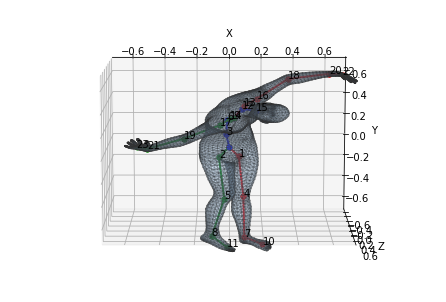

tensor(690.6414, grad_fn=<SumBackward0>)
tensor(688.0788, grad_fn=<SumBackward0>)
tensor(685.5302, grad_fn=<SumBackward0>)
tensor(682.9958, grad_fn=<SumBackward0>)
tensor(680.4754, grad_fn=<SumBackward0>)
tensor(677.9691, grad_fn=<SumBackward0>)
tensor(675.4767, grad_fn=<SumBackward0>)
tensor(672.9979, grad_fn=<SumBackward0>)
tensor(670.5328, grad_fn=<SumBackward0>)
tensor(668.0815, grad_fn=<SumBackward0>)
tensor(665.6432, grad_fn=<SumBackward0>)
tensor(663.2186, grad_fn=<SumBackward0>)
tensor(660.8074, grad_fn=<SumBackward0>)
tensor(658.4090, grad_fn=<SumBackward0>)
tensor(656.0238, grad_fn=<SumBackward0>)
tensor(653.6516, grad_fn=<SumBackward0>)
tensor(651.2922, grad_fn=<SumBackward0>)
tensor(648.9458, grad_fn=<SumBackward0>)
tensor(646.6119, grad_fn=<SumBackward0>)
tensor(644.2908, grad_fn=<SumBackward0>)
tensor(641.9820, grad_fn=<SumBackward0>)
tensor(639.6856, grad_fn=<SumBackward0>)
tensor(637.4016, grad_fn=<SumBackward0>)
tensor(635.1299, grad_fn=<SumBackward0>)
tensor(632.8702,

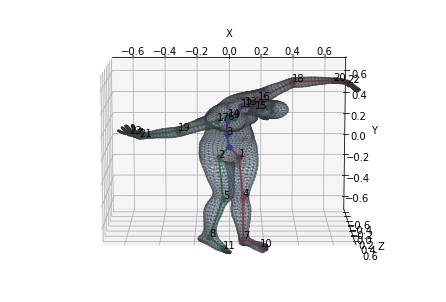

tensor(490.9150, grad_fn=<SumBackward0>)
tensor(489.3752, grad_fn=<SumBackward0>)
tensor(487.8424, grad_fn=<SumBackward0>)
tensor(486.3169, grad_fn=<SumBackward0>)
tensor(484.7983, grad_fn=<SumBackward0>)
tensor(483.2867, grad_fn=<SumBackward0>)
tensor(481.7820, grad_fn=<SumBackward0>)
tensor(480.2844, grad_fn=<SumBackward0>)
tensor(478.7936, grad_fn=<SumBackward0>)
tensor(477.3095, grad_fn=<SumBackward0>)
tensor(475.8323, grad_fn=<SumBackward0>)
tensor(474.3620, grad_fn=<SumBackward0>)
tensor(472.8982, grad_fn=<SumBackward0>)
tensor(471.4412, grad_fn=<SumBackward0>)
tensor(469.9907, grad_fn=<SumBackward0>)
tensor(468.5468, grad_fn=<SumBackward0>)
tensor(467.1095, grad_fn=<SumBackward0>)
tensor(465.6786, grad_fn=<SumBackward0>)
tensor(464.2545, grad_fn=<SumBackward0>)
tensor(462.8364, grad_fn=<SumBackward0>)
tensor(461.4250, grad_fn=<SumBackward0>)
tensor(460.0199, grad_fn=<SumBackward0>)
tensor(458.6209, grad_fn=<SumBackward0>)
tensor(457.2284, grad_fn=<SumBackward0>)
tensor(455.8422,

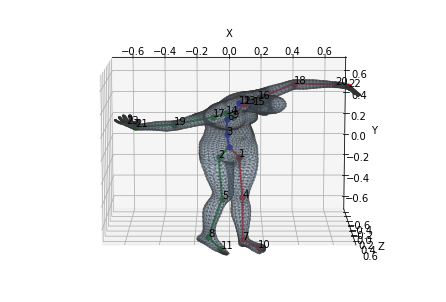

tensor(366.3267, grad_fn=<SumBackward0>)
tensor(365.3298, grad_fn=<SumBackward0>)
tensor(364.3369, grad_fn=<SumBackward0>)
tensor(363.3481, grad_fn=<SumBackward0>)
tensor(362.3633, grad_fn=<SumBackward0>)
tensor(361.3825, grad_fn=<SumBackward0>)
tensor(360.4059, grad_fn=<SumBackward0>)
tensor(359.4330, grad_fn=<SumBackward0>)
tensor(358.4641, grad_fn=<SumBackward0>)
tensor(357.4992, grad_fn=<SumBackward0>)
tensor(356.5383, grad_fn=<SumBackward0>)
tensor(355.5812, grad_fn=<SumBackward0>)
tensor(354.6279, grad_fn=<SumBackward0>)
tensor(353.6786, grad_fn=<SumBackward0>)
tensor(352.7330, grad_fn=<SumBackward0>)
tensor(351.7913, grad_fn=<SumBackward0>)
tensor(350.8533, grad_fn=<SumBackward0>)
tensor(349.9192, grad_fn=<SumBackward0>)
tensor(348.9890, grad_fn=<SumBackward0>)
tensor(348.0622, grad_fn=<SumBackward0>)
tensor(347.1393, grad_fn=<SumBackward0>)
tensor(346.2202, grad_fn=<SumBackward0>)
tensor(345.3045, grad_fn=<SumBackward0>)
tensor(344.3926, grad_fn=<SumBackward0>)
tensor(343.4843,

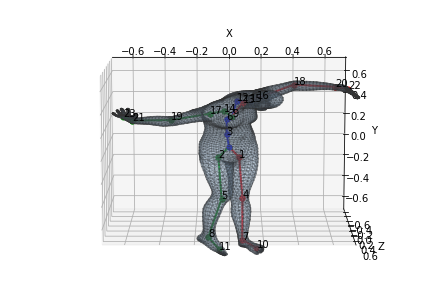

tensor(283.8931, grad_fn=<SumBackward0>)
tensor(283.2186, grad_fn=<SumBackward0>)
tensor(282.5466, grad_fn=<SumBackward0>)
tensor(281.8771, grad_fn=<SumBackward0>)
tensor(281.2101, grad_fn=<SumBackward0>)
tensor(280.5455, grad_fn=<SumBackward0>)
tensor(279.8835, grad_fn=<SumBackward0>)
tensor(279.2239, grad_fn=<SumBackward0>)
tensor(278.5667, grad_fn=<SumBackward0>)
tensor(277.9120, grad_fn=<SumBackward0>)
tensor(277.2596, grad_fn=<SumBackward0>)
tensor(276.6097, grad_fn=<SumBackward0>)
tensor(275.9621, grad_fn=<SumBackward0>)
tensor(275.3170, grad_fn=<SumBackward0>)
tensor(274.6742, grad_fn=<SumBackward0>)
tensor(274.0339, grad_fn=<SumBackward0>)
tensor(273.3959, grad_fn=<SumBackward0>)
tensor(272.7600, grad_fn=<SumBackward0>)
tensor(272.1267, grad_fn=<SumBackward0>)
tensor(271.4956, grad_fn=<SumBackward0>)
tensor(270.8669, grad_fn=<SumBackward0>)
tensor(270.2405, grad_fn=<SumBackward0>)
tensor(269.6163, grad_fn=<SumBackward0>)
tensor(268.9944, grad_fn=<SumBackward0>)
tensor(268.3749,

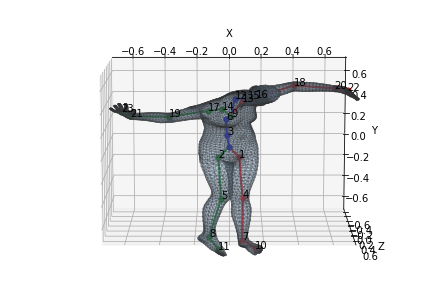

tensor(227.2257, grad_fn=<SumBackward0>)
tensor(226.7540, grad_fn=<SumBackward0>)
tensor(226.2840, grad_fn=<SumBackward0>)
tensor(225.8157, grad_fn=<SumBackward0>)
tensor(225.3489, grad_fn=<SumBackward0>)
tensor(224.8838, grad_fn=<SumBackward0>)
tensor(224.4201, grad_fn=<SumBackward0>)
tensor(223.9583, grad_fn=<SumBackward0>)
tensor(223.4978, grad_fn=<SumBackward0>)
tensor(223.0390, grad_fn=<SumBackward0>)
tensor(222.5818, grad_fn=<SumBackward0>)
tensor(222.1262, grad_fn=<SumBackward0>)
tensor(221.6720, grad_fn=<SumBackward0>)
tensor(221.2193, grad_fn=<SumBackward0>)
tensor(220.7683, grad_fn=<SumBackward0>)
tensor(220.3188, grad_fn=<SumBackward0>)
tensor(219.8708, grad_fn=<SumBackward0>)
tensor(219.4243, grad_fn=<SumBackward0>)
tensor(218.9794, grad_fn=<SumBackward0>)
tensor(218.5360, grad_fn=<SumBackward0>)
tensor(218.0941, grad_fn=<SumBackward0>)
tensor(217.6536, grad_fn=<SumBackward0>)
tensor(217.2147, grad_fn=<SumBackward0>)
tensor(216.7772, grad_fn=<SumBackward0>)
tensor(216.3412,

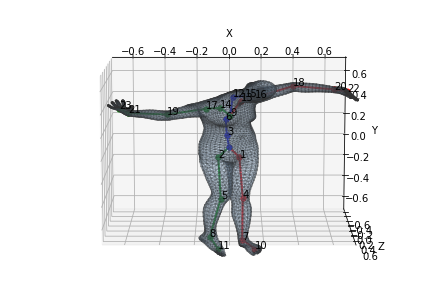

tensor(187.1190, grad_fn=<SumBackward0>)
tensor(186.7809, grad_fn=<SumBackward0>)
tensor(186.4440, grad_fn=<SumBackward0>)
tensor(186.1082, grad_fn=<SumBackward0>)
tensor(185.7733, grad_fn=<SumBackward0>)
tensor(185.4396, grad_fn=<SumBackward0>)
tensor(185.1070, grad_fn=<SumBackward0>)
tensor(184.7753, grad_fn=<SumBackward0>)
tensor(184.4448, grad_fn=<SumBackward0>)
tensor(184.1153, grad_fn=<SumBackward0>)
tensor(183.7869, grad_fn=<SumBackward0>)
tensor(183.4596, grad_fn=<SumBackward0>)
tensor(183.1332, grad_fn=<SumBackward0>)
tensor(182.8080, grad_fn=<SumBackward0>)
tensor(182.4837, grad_fn=<SumBackward0>)
tensor(182.1605, grad_fn=<SumBackward0>)
tensor(181.8383, grad_fn=<SumBackward0>)
tensor(181.5172, grad_fn=<SumBackward0>)
tensor(181.1971, grad_fn=<SumBackward0>)
tensor(180.8780, grad_fn=<SumBackward0>)
tensor(180.5599, grad_fn=<SumBackward0>)
tensor(180.2428, grad_fn=<SumBackward0>)
tensor(179.9268, grad_fn=<SumBackward0>)
tensor(179.6117, grad_fn=<SumBackward0>)
tensor(179.2976,

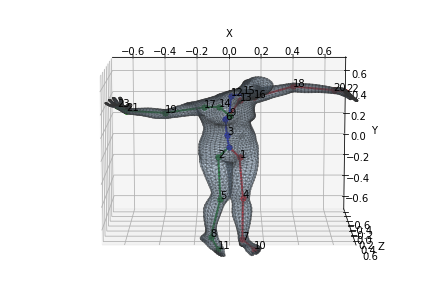

In [73]:
#Adam local minimum


# Generate random pose and shape parameters
pose_params = torch.rand(batch_size, 72)*0.5

pose_params.requires_grad_()
shape_params = torch.rand(batch_size, 10)*0.1
shape_params.requires_grad_()
# Forward from the SMPL layer
optimizer = torch.optim.Adam([pose_params, shape_params], lr=0.0005)
for i in range(1000):
  verts, Jtr = smpl_layer(pose_params, shape_params)

  loss=loss_function(true_verts,verts)
  print(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if(i%100==0):
    display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)
# Draw output vertices and joints
display_model(
        {'verts': verts.cpu().detach(),
         'joints': Jtr.cpu().detach()},
        model_faces=smpl_layer.th_faces,
        with_joints=True,
        kintree_table=smpl_layer.kintree_table,
        savepath='image.png',
        show=True)

In [7]:
def SMPL(Beta,Theta):
  verts, Jtr=smpl_layer(Beta,Theta)
  return verts


In [8]:

import torch

from smplpytorch.pytorch.smpl_layer import SMPL_Layer


def mesh_generation():

  cuda = False
  batch_size = 1

  # Create the SMPL layer
  smpl_layer = SMPL_Layer(
  center_idx=0,
  gender='neutral',
  model_root='/content/smpl-dr-clip')

  # Generate random pose and shape parameters
  for i in range(5):
    pose_params = torch.rand(batch_size, 72) * (0.2-i*0.1)
    shape_params = torch.rand(batch_size, 10) * 0.03

      # GPU mode
    if cuda:
      pose_params = pose_params.cuda()
      shape_params = shape_params.cuda()
      smpl_layer.cuda()

    # Forward from the SMPL layer

    true_verts, true_Jtr = smpl_layer(pose_params, th_betas=shape_params)
    torch.save(true_verts,"verts_"+str(i)+'.pt')
    torch.save(true_verts,"Jtr_"+str(i)+'.pt')
